# LVM Data Simulator tutorial: 2D simulations


**This is a tutorial on how run the simulator to produce 2D Raw spectra in the same format as they will be obtained with LVM. This is developed mainly for DRP tests.**
- How to install the simulator and how to prepare a custom simulation is shown in [tutorial #1](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial1.ipynb)
- More details on the setup of LVM instrumentation and on the structure of the outputs of the simulator are given in [tutorial #2](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial2.ipynb)
- More realistic and useful simulations are considered in [tutorial #3](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial3.ipynb) - please go there if you have already installed and configured the package and want to learn how to simulate the source field in more details.
- If you want to learn how to use the code as exposure time calculator (ETC) - please go there [tutorial #4](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial4.ipynb).

_Last update: 2022/11/21_

**Note: This tutorial is in preparation!!! Don't trust it too much :)**

In [1]:
from lvmdatasimulator.simulator2d import Simulator2D
from lvmdatasimulator.field import LVMField
from lvmdatasimulator.observation import Observation
from lvmdatasimulator.telescope import LVM160
from lvmdatasimulator.instrument import LVMSpectrograph
from lvmdatasimulator.fibers import FiberBundle

import astropy.units as u
from astropy.io import fits
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch, LinearStretch
from matplotlib import pyplot as plt

In [2]:
tel = LVM160()
spec = LVMSpectrograph()
# we moderately limit the number of fibers to speed up the calculations.
bundle = FiberBundle(bundle_name='full', nrings=8)

ra = 12.34 # u.degree
dec = -20.35 # u.degree
fov_size = 35 # u.arcmin
fov_pixel = 5 # u.arcsec
distance = 50 # * u.kpc
turbulent_sigma = 20 #* u.km / u.s

[WARNING]: nrings is defined. It will limit the number of fibers selected.
[INFO]: Using the full hexagon pattern
[INFO]: Using the inner 8 hexagonal rings.


In [3]:
name = 'LVM_2D_test'
my_lvmfield = LVMField(ra=ra, dec=dec, size=fov_size, pxsize=fov_pixel, name=name,
                       ism_params={'distance': distance, 'turbulent_sigma': turbulent_sigma,})
my_lvmfield.generate_gaia_stars(gmag_limit=15)
dig = {"type": 'DIG', 'max_brightness': 2e-16, 'perturb_amplitude': 0.1, 'perturb_scale': 500 * u.pc}
my_lvmfield.add_nebulae(dig)

[INFO]: 719 Gaia stars in the field
[INFO]: 685 stars are fainter than 15 and have been rejected
[INFO]: Transforming world coordinates to pixel coordinates
[INFO]: Associating spectra to stars using library pollux_resampled_v0.fits...


INFO: Query finished. [astroquery.utils.tap.core]


[INFO]: Rescaling 34 synthetic spectra.
[INFO]: Saving star list to: ./LVM_2D_test/LVM_2D_test_starlist.fits.gz
[WARNING]: The file ././LVM_2D_test/LVM_2D_test_starlist.fits.gz already exist and it will be overwritten


[INFO]: Start generating 1 nebulae
[WARNING]: No model ids or model parameters are set for the nebula #0: use default cloudy 'model_id=Cloud_366'


[WARNING]: Bundle center coords are not defined, using the coords of the field.


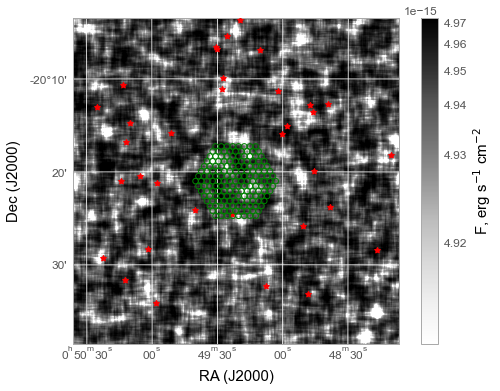

In [4]:
my_lvmfield.show(cmap=plt.cm.Greys, percentile=96, fibers=bundle.fibers)

In [5]:
exptimes = [900] # in seconds
obs = Observation(ra=ra, dec=dec, unit_ra=u.deg, unit_dec=u.deg, exptimes=exptimes)
sim = Simulator2D(my_lvmfield, obs, spec, bundle, tel)

In [6]:
sim.simulate_science()

[INFO]: Recovering target spectra for 169 fibers.
[INFO]: Start extracting nebular spectra
[INFO]: Reading the atmospheric extinction from file.
[INFO]: Simulating the sky emission 2 days from new moon.
[INFO]: Using sky file: /Users/mors/Science/PyWorkspace/lvmdatasimulator/data/sky/LVM_LVM160_SKY_2.dat
[INFO]: Resample sky emission to instrument wavelength solution.
[INFO]: Generating standard stars
[INFO]: star 1 with Teff 5500, Gmag 6.299999999999995 and velocity 0 added at position (0 , 0)
[INFO]: star 2 with Teff 5750, Gmag 8.799999999999986 and velocity 0 added at position (0 , 0)
[INFO]: star 3 with Teff 5500, Gmag 7.3999999999999915 and velocity 0 added at position (0 , 0)
[INFO]: star 4 with Teff 6250, Gmag 6.899999999999993 and velocity 0 added at position (0 , 0)
[INFO]: star 5 with Teff 5500, Gmag 7.499999999999991 and velocity 0 added at position (0 , 0)
[INFO]: star 6 with Teff 5500, Gmag 5.799999999999997 and velocity 0 added at position (0 , 0)
[INFO]: star 7 with Teff

[INFO]: Saving science exposures with 900s exposures and 10s of exposure for each standard star


ValueError: operands could not be broadcast together with shapes (3794,21) (21,3794) 